[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mariyamuneeb/ssl_wordspotting/blob/main/VariationalAE.ipynb)

## Project Setup

In [1]:
import warnings
warnings.simplefilter('ignore')
import os
!git clone https://github.com/mariyamuneeb/ssl_wordspotting
os.chdir('/content/ssl_wordspotting')
!pip install -qqq wandb

from setup_wandb import wandb_login
wandb_login()

Cloning into 'ssl_wordspotting'...
remote: Enumerating objects: 352, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 352 (delta 31), reused 48 (delta 17), pack-reused 281
Receiving objects: 100% (352/352), 9.13 MiB | 16.90 MiB/s, done.
Resolving deltas: 100% (187/187), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
/content/ssl_wordspotting
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [5]:
import torch

In [6]:
import matplotlib.pyplot as plt # plotting library
import numpy as np # this module is useful to work with numerical arrays
import pandas as pd 
import random 
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import wandb
import numpy as np
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Standard Datasets

## Initialization

In [ ]:
num_channels = 3
base_channel_size=32
lr = 10e-2
latent_dim = 384
epochs = 300
plot_freq = 10

wandb.init(
      # Set the project where this run will be logged
      project="SSL", 
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"VAE", 
      # Track hyperparameters and run metadata
      config={
      "architecture": "CNN",
      "dataset": "CIFAR-10",
      "epochs": epochs,
      "latent_dim":latent_dim
      })

In [ ]:
torch.manual_seed(0)

# d = 4

vae = VariationalAutoencoder(latent_dims=4)

optim = torch.optim.Adam(vae.parameters(), lr=lr)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

vae.to(device)

## Import/Load Datasets

In [ ]:
data_dir = 'dataset'
# train_dataset = torchvision.datasets.MNIST(data_dir, train = True, download = True)
# test_dataset  = torchvision.datasets.MNIST(data_dir, train=False, download=True)

train_dataset = torchvision.datasets.CIFAR10(data_dir,train=True,download=True)
test_dataset  = torchvision.datasets.CIFAR10(data_dir,train=False, download=True)

In [ ]:
img = train_dataset[1][0]
label = train_dataset[1][1]
print(img.mode)
print(label)
plt.imshow(img)
plt.show()

In [ ]:
img.size

In [ ]:
train_transform = transforms.Compose([transforms.ToTensor(), ])

test_transform = transforms.Compose([transforms.ToTensor(), ])

In [ ]:
train_dataset.transform = train_transform
test_dataset.transform = test_transform

m=len(train_dataset)

train_data, val_data = random_split(train_dataset, [int(m-m*0.2), int(m*0.2)])
batch_size=256

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

VariationalAutoencoder class, which combines the Encoder and Decoder classes 
The encoder and decoder networks contain **three convolutional layers** and **two fully connected layers**. 
Some batch normal layers are added to have more robust features in the latent space. 
Differently from the standard autoencoder, the **encoder returns mean and variance matrices** and we use them to obtain the sampled latent vector. 

## Training Loop

In [ ]:
for epoch in range(epochs):
   train_loss = train_epoch(vae,device,train_loader,optim)
   val_loss = test_epoch(vae,device,valid_loader)
   print('\n EPOCH {}/{} \t train loss {:.3f} \t val loss {:.3f}'.format(epoch + 1, epochs,train_loss,val_loss))
   if epoch%plot_freq==0:
       plot_ae_outputs(vae.encoder,vae.decoder,n=10)

In [ ]:
break

In [ ]:
train_loader

# VAE on Hand-written Dataset 

## Dataset

### Connect to GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/Datasets/tif'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Imports

In [ ]:
import os
import cv2
import math
from PIL import Image
import matplotlib.pyplot as plt
from statistics import mean
from math import floor

### Custom Dataset Definition

In [ ]:
images_paths = [os.path.join(PATH,i) for i in os.listdir(PATH)]
split = 0.85
train_idx = math.floor(split*len(images_paths))
train_images = images_paths[:train_idx]
test_images = images_paths[train_idx:]

### Plotting Few Images

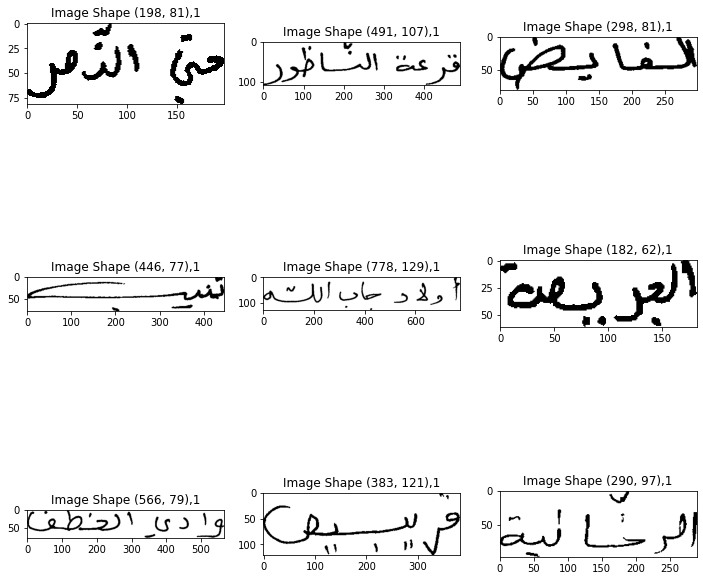

In [ ]:
random_imgs = random.sample(train_images, 9)
random_imgs = [Image.open(i) for i in random_imgs]
_, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(random_imgs, axs):
    ax.imshow(img)
    ax.title.set_text(f'Image Shape {img.size},{img.mode}')
plt.show()

### Finding Ave Image Dimensions

In [ ]:
h_list = list()
w_list = list()

for p in train_images:
    h_list.append(Image.open(p).size[1])
    w_list.append(Image.open(p).size[0])
num_channels = int(Image.open(p).mode)

h_ave = floor(mean(h_list))
w_ave = floor(mean(w_list))
# resize_size = (h_ave,w_ave)
resize_size = (128,128)

### Dataset Definitions

In [ ]:
train_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Resize(resize_size),])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Resize(resize_size),])

hw_train_dataset = MyDataset(img_paths=train_images,transform=train_transform)
hw_test_dataset = MyDataset(img_paths=test_images,transform=test_transform)

NameError: ignored

### Dataloader and Batching Definitions

In [ ]:
m=len(hw_train_dataset)


batch_size=8

train_loader = torch.utils.data.DataLoader(hw_train_dataset, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(hw_test_dataset, batch_size=batch_size)

## Plotting

## Initialization

### Hyperparameters

In [ ]:
base_channel_size = 32
lr = 1e-3
latent_dim = 512
epochs = 300
plot_freq = 10

In [ ]:
hw_train_dataset[0][0].shape

### W&B Init

In [ ]:
wandb.init(
      # Set the project where this run will be logged
      project="SSL", 
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"VAE", 
      # Track hyperparameters and run metadata
      config={
      "architecture": "CNN",
      "dataset": "Hand Written Dataset",
      "lr":lr,
      "epochs": epochs,
      "latent_dim":latent_dim
      })

### Initialize VAE

Initialize the VariationalAutoencoder class, the optimizer, and the device to use the GPU in the code.

In [ ]:
torch.manual_seed(0)

vae = VariationalAutoencoder(num_channels,base_channel_size,latent_dim)
print(vae)

optim = torch.optim.Adam(vae.parameters(), lr=lr)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')
vae.to(device)

## Training

### Train Loop

In [ ]:
for epoch in range(epochs):
   train_loss = train_epoch(vae,device,train_loader,optim)
   val_loss = test_epoch(vae,device,valid_loader)
   print('\n EPOCH {}/{} \t train loss {:.3f} \t val loss {:.3f}'.format(epoch + 1, epochs,train_loss,val_loss))
   if epoch%plot_freq==0:
       plot_ae_custom_ds_outputs(vae.encoder,vae.decoder,hw_test_dataset,n=10)

# IAM Dataset


## Dataset

In [2]:
from models.dataset import IAMDataset2,IAMDataset,IAMSubset
from models.layers import VariationalEncoder,Decoder
from experiment_utils.utils import train_epoch,test_epoch
from PIL import Image
from math import floor
from statistics import mean

### Copy Dataset to Colab Instance

In [3]:
from data_utils.utils import copy_iam_dataset_to_colab
copy_iam_dataset_to_colab()

Copying IAM Dataset from GDrive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/ssl_wordspotting/data/IAM_HW/words.tgz now copied
/content/ssl_wordspotting/data/IAM_HW/xml.tgz now copied
/content/ssl_wordspotting/data/IAM_HW/rules.zip now copied
Copied IAM HW Files


In [ ]:
# train_dir = '/content/ssl_wordspotting/data/words_training'
# test_dir = '/content/ssl_wordspotting/data/words_test'

In [7]:
resize_size = (128,128)
train_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Resize(resize_size),])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Resize(resize_size),])
iam_train_dataset = IAMDataset2('train',transform=train_transform)
iam_test_dataset = IAMDataset2('test',transform=train_transform)


In [8]:
subset_iam_train_dataset = IAMSubset().subset(iam_train_dataset,0.2)
subset_iam_test_dataset = IAMSubset().subset(iam_test_dataset,0.2)

### Plot Few Samples

In [9]:
from data_utils.plotting import plot_iam_samples,plot_reconstructions,plot_iam_reconstructions
# plot_iam_samples(iam_train_dataset,9)

In [10]:
batch_size=256

train_loader = torch.utils.data.DataLoader(subset_iam_train_dataset, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(subset_iam_test_dataset, batch_size=batch_size)

## Initialization

### HyperParameters

In [11]:
base_channel_size = 32
num_channels = 3
lr = 1e-3
latent_dim = 512
epochs = 150
plot_freq = 10

### W&B Init

In [12]:
wandb.init(
      # Set the project where this run will be logged
      project="SSL", 
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"IAM VAE", 
      # Track hyperparameters and run metadata
      config={
      "architecture": "CNN",
      "dataset": "IAM Hand Written Dataset",
      "lr":lr,
      "epochs": epochs,
      "latent_dim":latent_dim
      })

wandb: Currently logged in as: mariyamuneeb. Use `wandb login --relogin` to force relogin


### Define VAE

In [13]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, num_channels, base_channel_size, latent_dim):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = VariationalEncoder(num_channels, base_channel_size, latent_dim)
        self.decoder = Decoder(num_channels, base_channel_size, latent_dim)

    def forward(self, x):
        x = x.to(device)
        z = self.encoder(x)
        return self.decoder(z)

### Initialize VAE

In [14]:
torch.manual_seed(0)

vae = VariationalAutoencoder(num_channels,base_channel_size,latent_dim)

vae.to(device)
optim = torch.optim.Adam(vae.parameters(), lr=lr)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')


Selected device: cuda


## Training

### Train Loop

In [15]:
for epoch in range(epochs):
   train_loss = train_epoch(vae,device,train_loader,optim)
   val_loss = test_epoch(vae,device,valid_loader)
   print('\n EPOCH {}/{} \t train loss {:.3f} \t val loss {:.3f}'.format(epoch + 1, epochs,train_loss,val_loss))
   if epoch%plot_freq==0:
       plot_reconstructions(vae.encoder,vae.decoder,iam_test_dataset,device, n=10)
       

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

RuntimeError: ignored

In [ ]:
device

## Initialization

### HyperParameters

In [16]:
base_channel_size = 32
num_channels = 1
lr = 1e-3
latent_dim = 512
epochs = 150
plot_freq = 10

### W&B Init

In [17]:
wandb.init(
      # Set the project where this run will be logged
      project="SSL", 
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"IAM VAE", 
      # Track hyperparameters and run metadata
      config={
      "architecture": "CNN",
      "dataset": "IAM Hand Written Dataset",
      "lr":lr,
      "epochs": epochs,
      "latent_dim":latent_dim
      })

### Define VAE

In [18]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, num_channels, base_channel_size, latent_dim):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = VariationalEncoder(num_channels, base_channel_size, latent_dim)
        self.decoder = Decoder(num_channels, base_channel_size, latent_dim)

    def forward(self, x):
        x = x.to(device)
        z = self.encoder(x)
        return self.decoder(z)

### Initialize VAE

In [19]:
torch.manual_seed(0)

vae = VariationalAutoencoder(num_channels,base_channel_size,latent_dim)

vae.to(device)
optim = torch.optim.Adam(vae.parameters(), lr=lr)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')


Selected device: cuda


## Training

### Train Loop

In [20]:
for epoch in range(epochs):
    train_loss = train_epoch(vae,device,train_loader,optim)
    val_loss = test_epoch(vae,device,valid_loader)
    
    print('\n EPOCH {}/{} \t train loss {:.3f} \t val loss {:.3f}'.format(epoch + 1, epochs,train_loss,val_loss))
    if epoch%plot_freq==0:
        plot_iam_reconstructions(vae.encoder,vae.decoder,iam_test_dataset,device,'IAM HW', n=10)
        
        ## save model here
        ## run evaluation of MAP

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to

ValueError: ignored

In [ ]:
PATH = '/content/drive/MyDrive/Mariyah_Phd/weights/vae_weights.pt'
torch.save(model, PATH)

NameError: ignored

In [ ]:
!pwd

In [ ]:
def plot_iam_reconstructions(encoder, decoder, test_dataset, device, dataset_name, n=10):
    wandb_imgs = list()
    wandb_rec_imgs = list()
    my_table = wandb.Table(columns=["Original", "Reconstruction"])
    plt.figure(figsize=(16, 4.5))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        _, img, _ = test_dataset[i]
        img = img.unsqueeze(0).to(device)
        encoder.eval()
        decoder.eval()
        with torch.no_grad():
            rec_img = decoder(encoder(img))
        plt.imshow(img.cpu().squeeze().numpy().T, cmap='gist_gray')  # for MNIST remove the transpose
        #   plt.imshow(img.cpu().squeeze().numpy(), cmap='gist_gray') # for MNIST remove the transpose
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n // 2:
            ax.set_title('Original images')
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(rec_img.cpu().squeeze().numpy().T, cmap='gist_gray')  # for MNIST remove the transpose
        #   plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')  #for MNIST remove the transpose
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n // 2:
            ax.set_title('Reconstructed images')
        my_table.add_data(wandb.Image(img.cpu()), wandb.Image(rec_img.cpu()))
        wandb_imgs.append(img.cpu())
        wandb_rec_imgs.append(rec_img.cpu())
    plt.show()
    wandb.log({dataset_name: my_table})

In [ ]:
plot_iam_reconstructions(vae.encoder,vae.decoder,subset_iam_test_dataset,device,'IAM HW', n=10)

In [ ]:
def plot_iam_reconstructions(encoder, decoder, test_dataset, device, dataset_name, n=10):
    wandb_imgs = list()
    wandb_rec_imgs = list()
    my_table = wandb.Table(columns=["Original", "Reconstruction"])
    plt.figure(figsize=(16, 4.5))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        _, img, _ = test_dataset[i]
        img = img.unsqueeze(0).to(device)
        encoder.eval()
        decoder.eval()
        with torch.no_grad():
            rec_img = decoder(encoder(img))
        plt.imshow(img.cpu().squeeze().numpy().T, cmap='gist_gray')  # for MNIST remove the transpose
        #   plt.imshow(img.cpu().squeeze().numpy(), cmap='gist_gray') # for MNIST remove the transpose
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n // 2:
            ax.set_title('Original images')
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(rec_img.cpu().squeeze().numpy().T, cmap='gist_gray')  # for MNIST remove the transpose
        #   plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')  #for MNIST remove the transpose
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n // 2:
            ax.set_title('Reconstructed images')
        my_table.add_data(wandb.Image(img.cpu()), wandb.Image(rec_img.cpu()))
        wandb_imgs.append(img.cpu())
        wandb_rec_imgs.append(rec_img.cpu())
    plt.show()
    wandb.log({dataset_name: my_table})

In [ ]:
plot_iam_reconstructions(vae.encoder,vae.decoder,subset_iam_test_dataset,device,'IAM HW', n=10)

/content/ssl_wordspotting


In [ ]:
def plot_iam_reconstructions(encoder, decoder, test_dataset, device, dataset_name, n=10):
    wandb_imgs = list()
    wandb_rec_imgs = list()
    my_table = wandb.Table(columns=["Original", "Reconstruction"])
    plt.figure(figsize=(16, 4.5))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        _, img, _ = test_dataset[i]
        img = img.unsqueeze(0).to(device)
        encoder.eval()
        decoder.eval()
        with torch.no_grad():
            rec_img = decoder(encoder(img))
        plt.imshow(img.cpu().squeeze().numpy().T, cmap='gist_gray')  # for MNIST remove the transpose
        #   plt.imshow(img.cpu().squeeze().numpy(), cmap='gist_gray') # for MNIST remove the transpose
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n // 2:
            ax.set_title('Original images')
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(rec_img.cpu().squeeze().numpy().T, cmap='gist_gray')  # for MNIST remove the transpose
        #   plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')  #for MNIST remove the transpose
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n // 2:
            ax.set_title('Reconstructed images')
        my_table.add_data(wandb.Image(img.cpu()), wandb.Image(rec_img.cpu()))
        wandb_imgs.append(img.cpu())
        wandb_rec_imgs.append(rec_img.cpu())
    plt.show()
    wandb.log({dataset_name: my_table})

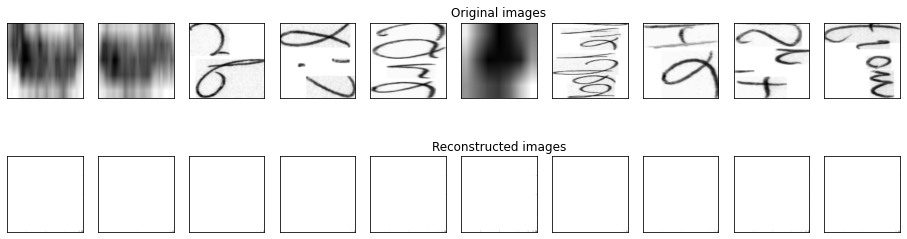

In [ ]:
plot_iam_reconstructions(vae.encoder,vae.decoder,subset_iam_test_dataset,device,'IAM HW', n=10)